# Họ và tên: Bùi Quốc Thịnh
# Mã số sinh viên: 20520934

## Load library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## Load dataset 50_startups.csv

In [2]:
dataset = pd.read_csv("./50_Startups.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [3]:
y = y.reshape(len(y), 1)

## Encodeing categorical

In [4]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

## Split dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear Regression

In [6]:
print('LR init')
lr = LinearRegression()
lr.fit(X_train, y_train)

LR init


LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
print(y_pred)
print(y_test)

[[103015.20159794]
 [132582.27760817]
 [132447.73845174]
 [ 71976.09851258]
 [178537.48221058]
 [116161.24230168]
 [ 67851.69209676]
 [ 98791.73374684]
 [113969.43533015]
 [167921.06569553]]
[[103282.38]
 [144259.4 ]
 [146121.95]
 [ 77798.83]
 [191050.39]
 [105008.31]
 [ 81229.06]
 [ 97483.56]
 [110352.25]
 [166187.94]]


In [8]:
mse = mean_squared_error(y_test, y_pred)
print('mse:', mse)

mse: 83502864.03255911


### Visualize linear regression

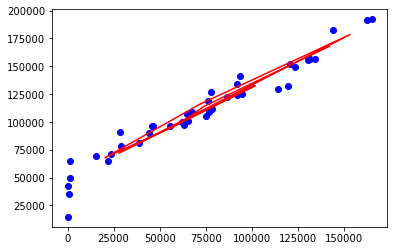

In [9]:
plt.scatter(X_train[:, 3], y_train, color= "blue")
plt.plot(X_test[:, 3], y_pred, color= "red")
plt.show()

## Decision Tree 

In [10]:
print('DT init')
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DT init


DecisionTreeRegressor()

In [11]:
y_pred = dt.predict(X_test)
print(y_pred)
print(y_test)

[101004.64 141585.52 141585.52  78239.91 182901.99 108733.99  71498.49
  97427.84 108733.99 182901.99]
[[103282.38]
 [144259.4 ]
 [146121.95]
 [ 77798.83]
 [191050.39]
 [105008.31]
 [ 81229.06]
 [ 97483.56]
 [110352.25]
 [166187.94]]


### Visualize decision tree 

[101004.64 141585.52 141585.52  78239.91 182901.99 108733.99  71498.49
  97427.84 108733.99 182901.99]


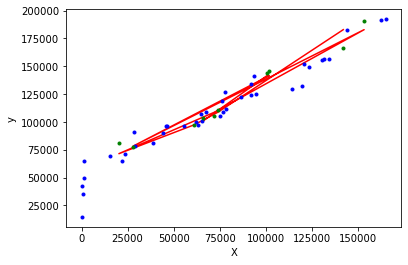

In [12]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1))))

plt.plot(X_test[:, 3], y_pred, "r-")
plt.plot(X_train[:, 3], y_train, "b.")
plt.plot(X_test[:, 3], y_test, "g.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Random Forest 

In [13]:
print('RF init')
rf =  RandomForestRegressor()
rf.fit(X_train, y_train)

RF init


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19240\1889392034.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [14]:
y_pred = rf.predict(X_test)
print(y_pred)
print(y_test)

[102904.71 135969.66 136576.07  79306.83 181336.05 113390.37  67118.65
  99369.6  112107.22 168471.44]
[[103282.38]
 [144259.4 ]
 [146121.95]
 [ 77798.83]
 [191050.39]
 [105008.31]
 [ 81229.06]
 [ 97483.56]
 [110352.25]
 [166187.94]]


### Visualize random forest

[102904.71 135969.66 136576.07  79306.83 181336.05 113390.37  67118.65
  99369.6  112107.22 168471.44]


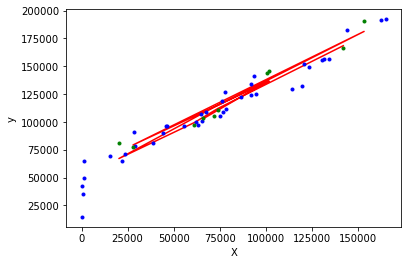

In [15]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1))))

plt.plot(X_test[:, 3], y_pred, "r-")
plt.plot(X_train[:, 3], y_train, "b.")
plt.plot(X_test[:, 3], y_test, "g.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## SVR

In [16]:
print('SVR init')
sv =  SVR()
sv.fit(X_train, y_train)

SVR init


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [17]:
y_pred = sv.predict(X_test)
print(y_pred)
print(y_test)

[107977.6  107986.47 107985.31 107978.21 107992.03 107990.72 107979.29
 107975.79 107988.99 107991.9 ]
[[103282.38]
 [144259.4 ]
 [146121.95]
 [ 77798.83]
 [191050.39]
 [105008.31]
 [ 81229.06]
 [ 97483.56]
 [110352.25]
 [166187.94]]


### Visualize SVR

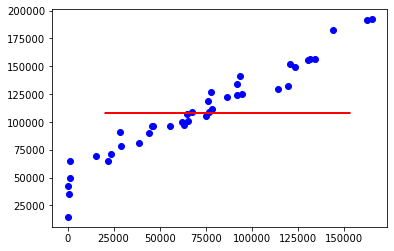

In [18]:
plt.scatter(X_train[:, 3], y_train, color= "blue")
plt.plot(X_test[:, 3], y_pred, color= "red")
plt.show()

## SVR with Polynomial kernel

In [19]:
print('SVR init')
sv =  SVR(kernel="poly", C=100, degree=3, epsilon=0.1, coef0=1)
sv.fit(X_train, y_train)

SVR init


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, coef0=1, kernel='poly')

In [20]:
y_pred = sv.predict(X_test)
print(y_pred)
print(y_test)

[103043.2  116401.84 114508.01 102473.04 156561.7  134800.33 103309.48
  99982.64 124685.04 142974.85]
[[103282.38]
 [144259.4 ]
 [146121.95]
 [ 77798.83]
 [191050.39]
 [105008.31]
 [ 81229.06]
 [ 97483.56]
 [110352.25]
 [166187.94]]


## Visualize SVR with Polynomial kernel

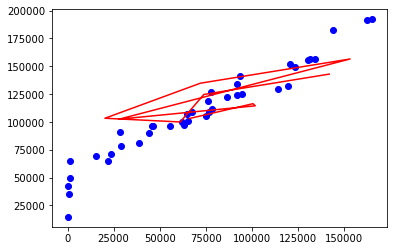

In [21]:
plt.scatter(X_train[:, 3], y_train, color= "blue")
plt.plot(X_test[:, 3], y_pred, color= "red")
plt.show()

## Polynomial Regression

In [22]:
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
print('Polynomial init')
poly = make_pipeline(PolynomialFeatures(6),LinearRegression())
poly.fit(X_train, y_train)

Polynomial init


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

In [24]:
print(f'score: {poly.score(X_test, y_test)}')

score: 0.908295339017582


In [25]:
X_seq = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
y_pred = poly.predict(X_seq)
print(y_pred)
print(y_test)

[ 67184.78  67184.78  67184.78  67184.81  67184.88  67185.02  67185.27
  67185.69  67186.33  67187.25  67188.52  67190.23  67192.44  67195.26
  67198.78  67203.1   67208.33  67214.58  67221.97  67230.63  67240.67
  67252.23  67265.44  67280.45  67297.38  67316.4   67337.64  67361.25
  67387.39  67416.21  67447.86  67482.52  67520.33  67561.45  67606.05
  67654.3   67706.35  67762.36  67822.51  67886.95  67955.85  68029.38
  68107.69  68190.95  68279.31  68372.95  68472.01  68576.66  68687.05
  68803.33  68925.66  69054.18  69189.05  69330.4   69478.38  69633.14
  69794.8   69963.5   70139.37  70322.55  70513.14  70711.28  70917.08
  71130.65  71352.1   71581.54  71819.07  72064.79  72318.78  72581.14
  72851.95  73131.29  73419.23  73715.84  74021.2   74335.35  74658.35
  74990.26  75331.12  75680.96  76039.82  76407.73  76784.72  77170.8
  77565.98  77970.28  78383.69  78806.21  79237.83  79678.53  80128.3
  80587.1   81054.91  81531.69  82017.39  82511.96  83015.35  83527.5
  84048.3

### Visualize polynomial regression

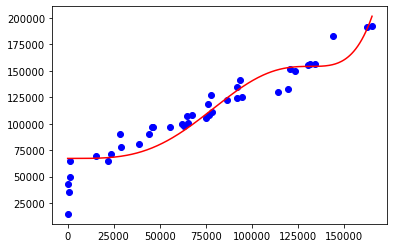

In [26]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_seq, y_pred, color='red')
plt.show()

## Comparision and comment

#### Hầu như các mô hình chỉ thể hiện ở mức tạm chấp nhận được với dạng dữ liệu nhiều features như 50_Startups.csv 